In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)



In [2]:
def perpen(x1, y1, x2, y2, x3, y3):
    # find (x4, y4) in the lind (x1, y1) -- (x2, y2) which is the projection of (x3, y3)
    k = ((y2-y1) * (x3-x1) - (x2-x1) * (y3-y1)) / ((y2-y1)**2 + (x2-x1)**2)
    x4 = x3 - k * (y2-y1)
    y4 = y3 + k * (x2-x1)
    return (x4, y4)

def parallel(x1, y1, x2, y2, x3, y3):
    # find y4 and y5 such that the line (x1,y4) -- (x2,y5) parallels with 
    # (x1, y1) -- (x2, y2) and goes through (x3, y3)
    k = (y2 - y1)/(x2 - x1) 
    c = y3 - k*x3 
    y4 = k*x1 + c 
    y5 = k*x2 + c 
    return (y4, y5)

# Random boundary

In [3]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(21)
from matplotlib.backends.backend_pdf import PdfPages

means = [[2, 2], [4, 1]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X1[-1, :] = [2.7, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

In [4]:
from sklearn.svm import SVC

# y1 = y.reshape((2*N,))
# X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 

clf.fit(X.T, y.reshape((2*N,))) 

w0 = clf.coef_[0, 0]
w1 = clf.coef_[0, 1]
b = b = clf.intercept_[0]

S = clf.support_

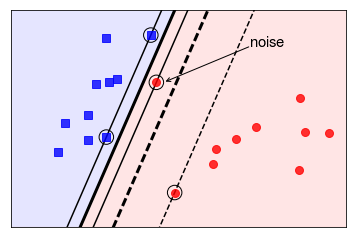

In [6]:
with PdfPages('ssvm1.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w0/w1*x1 - b/w1
    y2 = -w0/w1*x1 - (b-1)/w1
    y3 = -w0/w1*x1 - (b+1)/w1
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')

    
    
    # equal axis and lim
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # fill two regions
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha='0.1')
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')
    
    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)
    m = 15
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]
    
    (y5, y6) = parallel(xx1, yy1, xx2, yy2, X[0, m], X[1, m])
    plt.plot([xx1, xx2], [y5, y6], 'k', linestyle='--')
    
    y7 = 0.5*(y5 + y2[0])
    y8 = 0.5*(y6 + y2[-1])
    plt.plot([xx1, xx2], [y7, y8], 'k', linewidth = 3, linestyle='--')
    
#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)

    plt.text(4, 2.5, 'noise', fontsize=15)
    plt.annotate(s='', xy=(2.8, 2), xytext=(4, 2.5), arrowprops=dict(arrowstyle='->'))
    
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    pdf.savefig()
    plt.show()

In [7]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(21)
from matplotlib.backends.backend_pdf import PdfPages

means = [[2, 2], [4, 1]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
# X1[-1, :] = [2.7, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
#########
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
clf.fit(X.T, y.reshape((2*N,))) 

w0 = clf.coef_[0, 0]
w1 = clf.coef_[0, 1]
b = b = clf.intercept_[0]
S = clf.support_

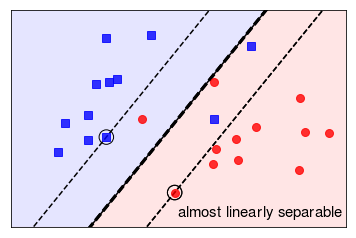

In [8]:
with PdfPages('ssvm2.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w0/w1*x1 - b/w1
    y2 = -w0/w1*x1 - (b-1)/w1
    y3 = -w0/w1*x1 - (b+1)/w1
    plt.plot(x1, y1, 'k', linewidth = 3, linestyle='--')
    plt.plot(x1, y2, 'k', linestyle='--')
    plt.plot(x1, y3, 'k', linestyle='--')

      
    # equal axis and lim
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # fill two regions
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha='0.1')
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')
    
    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)
    m = 15
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]
    
    (y5, y6) = parallel(xx1, yy1, xx2, yy2, X[0, m], X[1, m])
    plt.plot([xx1, xx2], [y5, y6], 'k', linestyle='--')
    
    y7 = 0.5*(y5 + y2[0])
    y8 = 0.5*(y6 + y2[-1])
    plt.plot([xx1, xx2], [y7, y8], 'k', linewidth = 3, linestyle='--')
    
#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)

    
    
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    
    X0n = np.array([[4, 2.5], [3.5, 1.5]])
    X1n = np.array([[2.5, 1.5], [3.5, 2]])
    plt.plot(X0n[:, 0], X0n[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1n[:, 0], X1n[:, 1], 'ro', markersize = 8, alpha = .8)
    
    plt.text(3, .15, 'almost linearly separable', fontsize=15)
    
    pdf.savefig()
    plt.show()

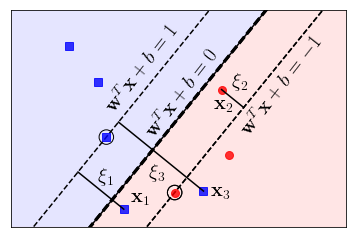

In [9]:
with PdfPages('ssvm3.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w0/w1*x1 - b/w1
    y2 = -w0/w1*x1 - (b-1)/w1
    y3 = -w0/w1*x1 - (b+1)/w1
    plt.plot(x1, y1, 'k', linewidth = 3, linestyle='--')
    plt.plot(x1, y2, 'k', linestyle='--')
    plt.plot(x1, y3, 'k', linestyle='--')

      
    # equal axis and lim
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # fill two regions
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha='0.1')
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')
    
    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)
    m = 15
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]
    
    (y5, y6) = parallel(xx1, yy1, xx2, yy2, X[0, m], X[1, m])
    plt.plot([xx1, xx2], [y5, y6], 'k', linestyle='--')
    
    y7 = 0.5*(y5 + y2[0])
    y8 = 0.5*(y6 + y2[-1])
    plt.plot([xx1, xx2], [y7, y8], 'k', linewidth = 3, linestyle='--')
    
#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)

    
    
    plt.plot(X0[2, 0], X0[2, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[5, 0], X1[5, 1], 'ro', markersize = 8, alpha = .8)
    
    X0n = np.array([[2.25, .25], [1.9, 2], [1.5, 2.5], [3.35, .5]])
    X1n = np.array([ [3.6, 1.9], [3.7, 1]])
    plt.plot(X0n[:, 0], X0n[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1n[:, 0], X1n[:, 1], 'ro', markersize = 8, alpha = .8)
    
    # perpendicular lines
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y2[0]
    yy2 = y2[-1]
    xx3 = X0n[0, 0]
    yy3 = X0n[0, 1]
    (x4, y4) = perpen(xx1, yy1, xx2, yy2, xx3, yy3)
    plt.plot([xx3, x4], [yy3, y4], color = 'k')
    
    xx3 = X0n[-1, 0]
    yy3 = X0n[-1, 1]
    (x4, y4) = perpen(xx1, yy1, xx2, yy2, xx3, yy3)
    plt.plot([xx3, x4], [yy3, y4], color = 'k')
    
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y3[0]
    yy2 = y3[-1]
    xx3 = X1n[0, 0]
    yy3 = X1n[0, 1]
    (x4, y4) = perpen(xx1, yy1, xx2, yy2, xx3, yy3)
    
    
    plt.plot([xx3, x4], [yy3, y4], color = 'k')
    plt.text(1.9, 0.6, r'$\xi_1$', fontsize=20)
    plt.text(3.75, 1.9, r'$\xi_2$', fontsize=20)
    plt.text(2.6, 0.65, r'$\xi_3$', fontsize=20)
    plt.text(2.35, .3, r'$\mathbf{x}_1$', fontsize=20)
    plt.text(3.5, 1.6, r'$\mathbf{x}_2$', fontsize=20)
    plt.text(3.45, .4, r'$\mathbf{x}_3$', fontsize=20)
    
    
    plt.text(2.5, 2.3, r'$\mathbf{w}^T\mathbf{x} + b = 0$', fontsize=20, rotation = 52)
    plt.text(1.95, 2.65, r'$\mathbf{w}^T\mathbf{x} + b = 1$', fontsize=20, rotation = 52)
    plt.text(3.8, 2.5, r'$\mathbf{w}^T\mathbf{x} + b = -1$', fontsize=20, rotation = 52)
    
    pdf.savefig()
    plt.show()

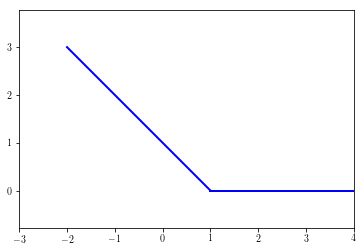

In [76]:
plt.plot([-2, 1], [3, 0], color = 'b', linewidth = 2)
plt.plot([1, 4], [0, 0], color = 'b', linewidth = 2)
# equal axis and lim
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(-3, 4)

plt.show()

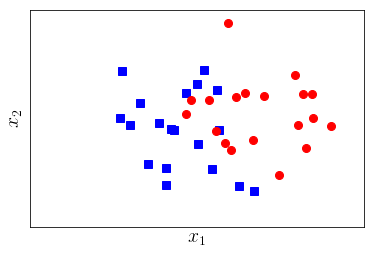

In [77]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [78]:
print(X0.shape)

(20, 2)


In [79]:
X = np.vstack((X0, X1))
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))

In [80]:
print(X.shape)
print(y.shape)

(40, 2)
(40,)


[[-0.75348094 -0.44806212]]
[ 3.13165685]


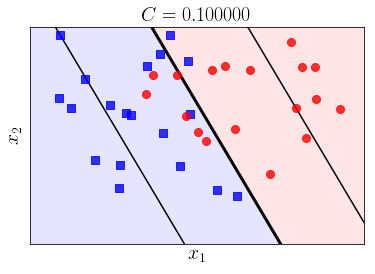

In [101]:
from sklearn.svm import SVC
C = .1
clf = SVC(kernel = 'linear', C = C) # just a big number 

clf.fit(X, y) 

print(clf.coef_)
print(clf.intercept_)
w0 = clf.coef_[0, 0]
w1 = clf.coef_[0, 1]
b = b = clf.intercept_[0]

w_sklearn = clf.coef_
b_sklearn = clf.intercept_[0]
S = clf.support_

with PdfPages('ssvm5_01.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w0/w1*x1 - b/w1
    y2 = -w0/w1*x1 - (b-1)/w1
    y3 = -w0/w1*x1 - (b+1)/w1
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')
     
    # equal axis and lim
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # fill two regions
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='blue', alpha='0.1')
    plt.fill_between(x1, y1, y4, color = 'red', alpha = '.1')
    plt.title('$C = %f$' % C, fontsize = 20)
    y7 = 0.5*(y5 + y2[0])
    y8 = 0.5*(y6 + y2[-1])

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    pdf.savefig()
    plt.show()